# SEABORN PYTHON : Pairplot, Boxplot, Heatmap,...etc

URL : https://youtu.be/xYgfIRzNPlo?si=g3K6bH4W9OlO9qdW

Les données: https://github.com/mwaskom/seaborn-data/blob/master/iris.csv

In [3]:
#importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualisation des données avec Seaborn

In [5]:
#lire le fichier iris.csv
#enregistrer le dataset sous une variable appelée iris
iris = pd.read_csv('iris.csv')

#afficher les 5 premières lignes de iris
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- **sepal_length:** longueur du sépale
- **sepal_width:** largeur du sépale
- **petal_length:** longueur du pétale
- **petal_width:** largeur du pétale
- **species:** espèce

### Visualisation des données avec Matplotlib

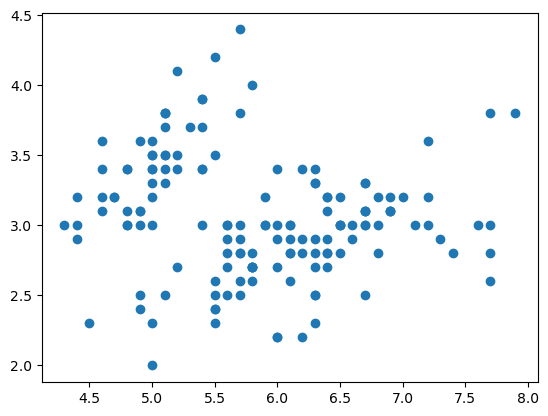

In [8]:
#visualiser la relation entre les colonnes sepal_length et sepal_width avec matplotlib
plt.scatter(iris['sepal_length'], iris['sepal_width'])

#les x: sepal_length
#les y: sepal_width

In [9]:
#en voit qu'il manque beaucoup de données dans ce graphique
#pas de de noms pr les axes, pas de titre, les couleurs pr distiguer les différentes espèces,...
#pr rendre ce graphique utile et facile à lire, il faut écrire beaucoup de code
#pour faciliter la tâche, on utilise Seaborn

### Visualisation des données avec Seaborn

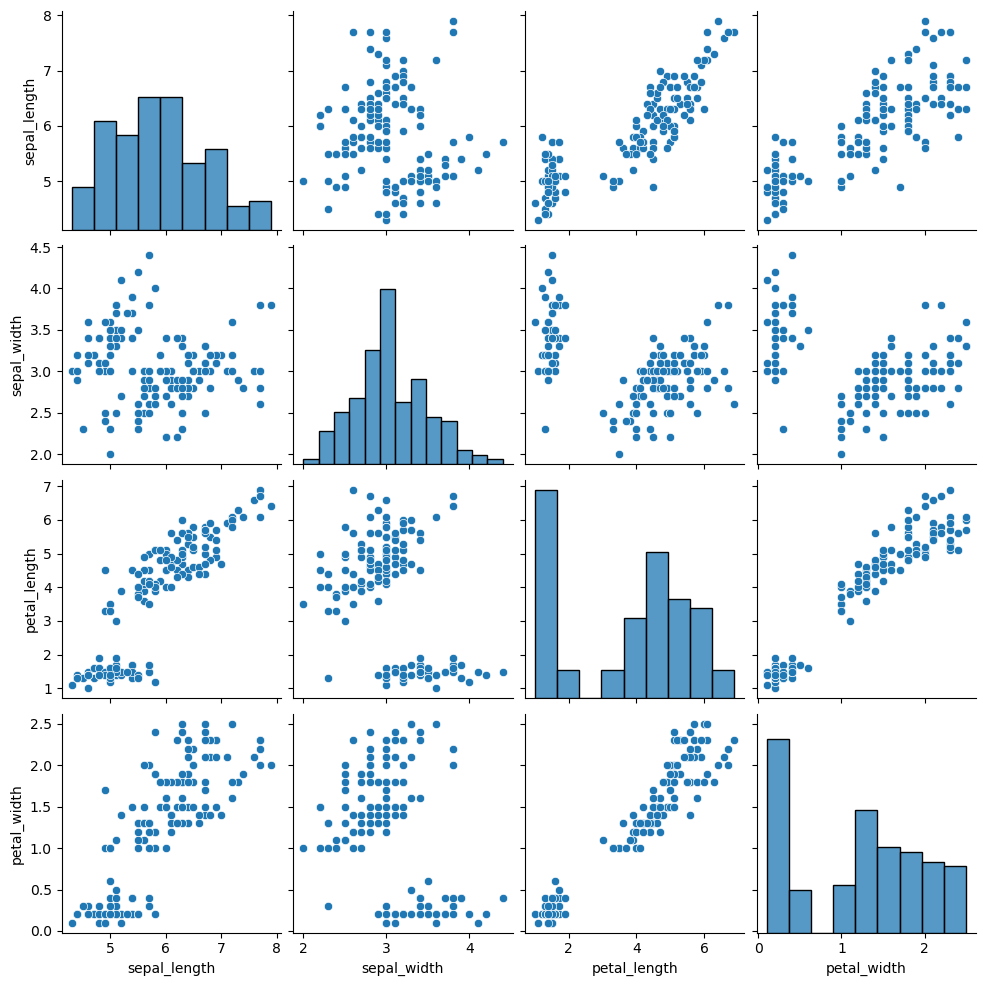

In [11]:
#visualiser les données d'iris avec seaborn.pairplot
sns.pairplot(iris)

In [12]:
#chaque scatter plot montre une relation entre 2 colonnes (regarder les 2 axes des x et des y)
#les histogrammes montrent la distribution de la variable (la colonne):
#sepal_width a une distribution normale
#petal_width n'a pas une distribution normale

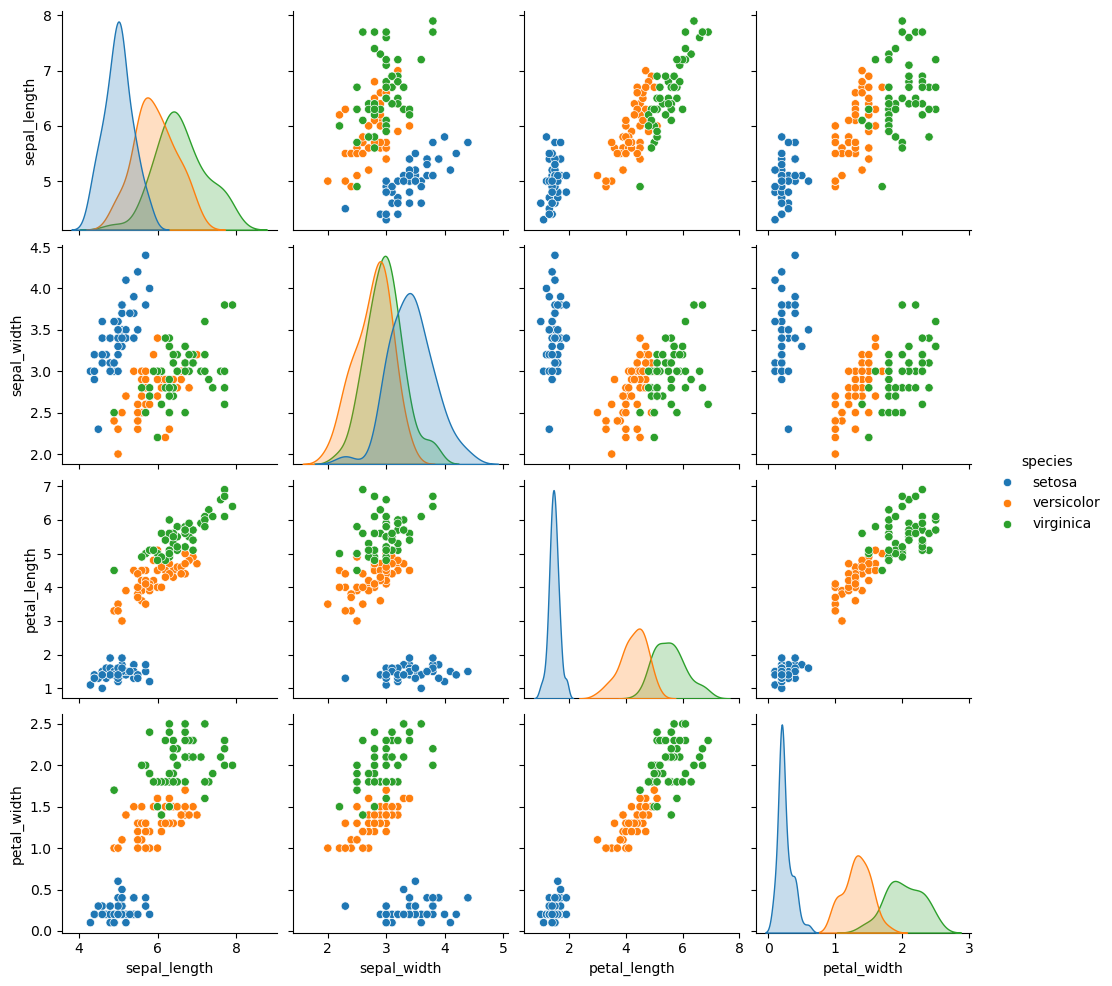

In [13]:
#visualiser les données d'iris avec seaborn.pairplot
sns.pairplot(iris, hue= 'species')

#pour voir la répartition des espèces d'iris en fonction des variables (colonnes) du dataset
#chaque couleur représente une espèce

Les fonctions Seaborn on presque toujours la même structure:

**sns.fonction(x,y,data, hue,size,kind)**

- **x,y,data** sont les données à afficher.
- **hue,size,kind** sont les options de ségmentation.

In [15]:
#charger le dataset du Titanic avec sns
titanic = sns.load_dataset('titanic')

#afficher les 5 premières lignes de titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


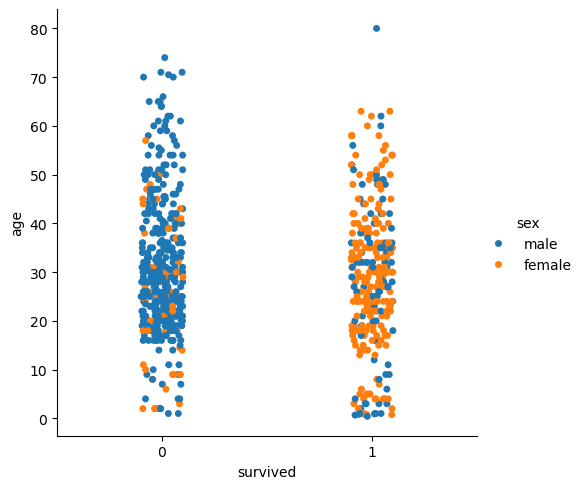

In [16]:
#afficher la relation entre les colonnes survived et age du dataset titanic
#les couleurs diffèrent selon la colonne sex
sns.catplot(x= 'survived', y= 'age', data= titanic, hue= 'sex')

In [17]:
#afficher les colonnes de titanic
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
#supprimer des colonnes (axis=1)
#inplace=True : modifie le DataFrame d'origine au lieu d'en renvoyer un nouveau
titanic.drop(['embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1, inplace= True)

#afficher les 5 premières lignes de titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C
4,0,3,male,35.0,0,0,8.0500,NaN


In [19]:
#dropna(): supprimer les valeurs manquantes (c'est-à-dire les valeurs NaN) du dataframe
#axis=0: supprimer les lignes (au lieu des colonnes, qui seraient axis=1) qui contiennent des valeurs manquantes
#inplace=True:l'opération doit modifier directement le dataframe d'origine plutôt que de renvoyer un nouveau dataframe sans les colonnes spécifiées
titanic.dropna(axis=0, inplace=True)

#afficher les 5 premières lignes de titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,C
6,0,1,male,54.0,0,0,51.8625,E
10,1,3,female,4.0,1,1,16.7000,G
11,1,1,female,58.0,0,0,26.5500,C


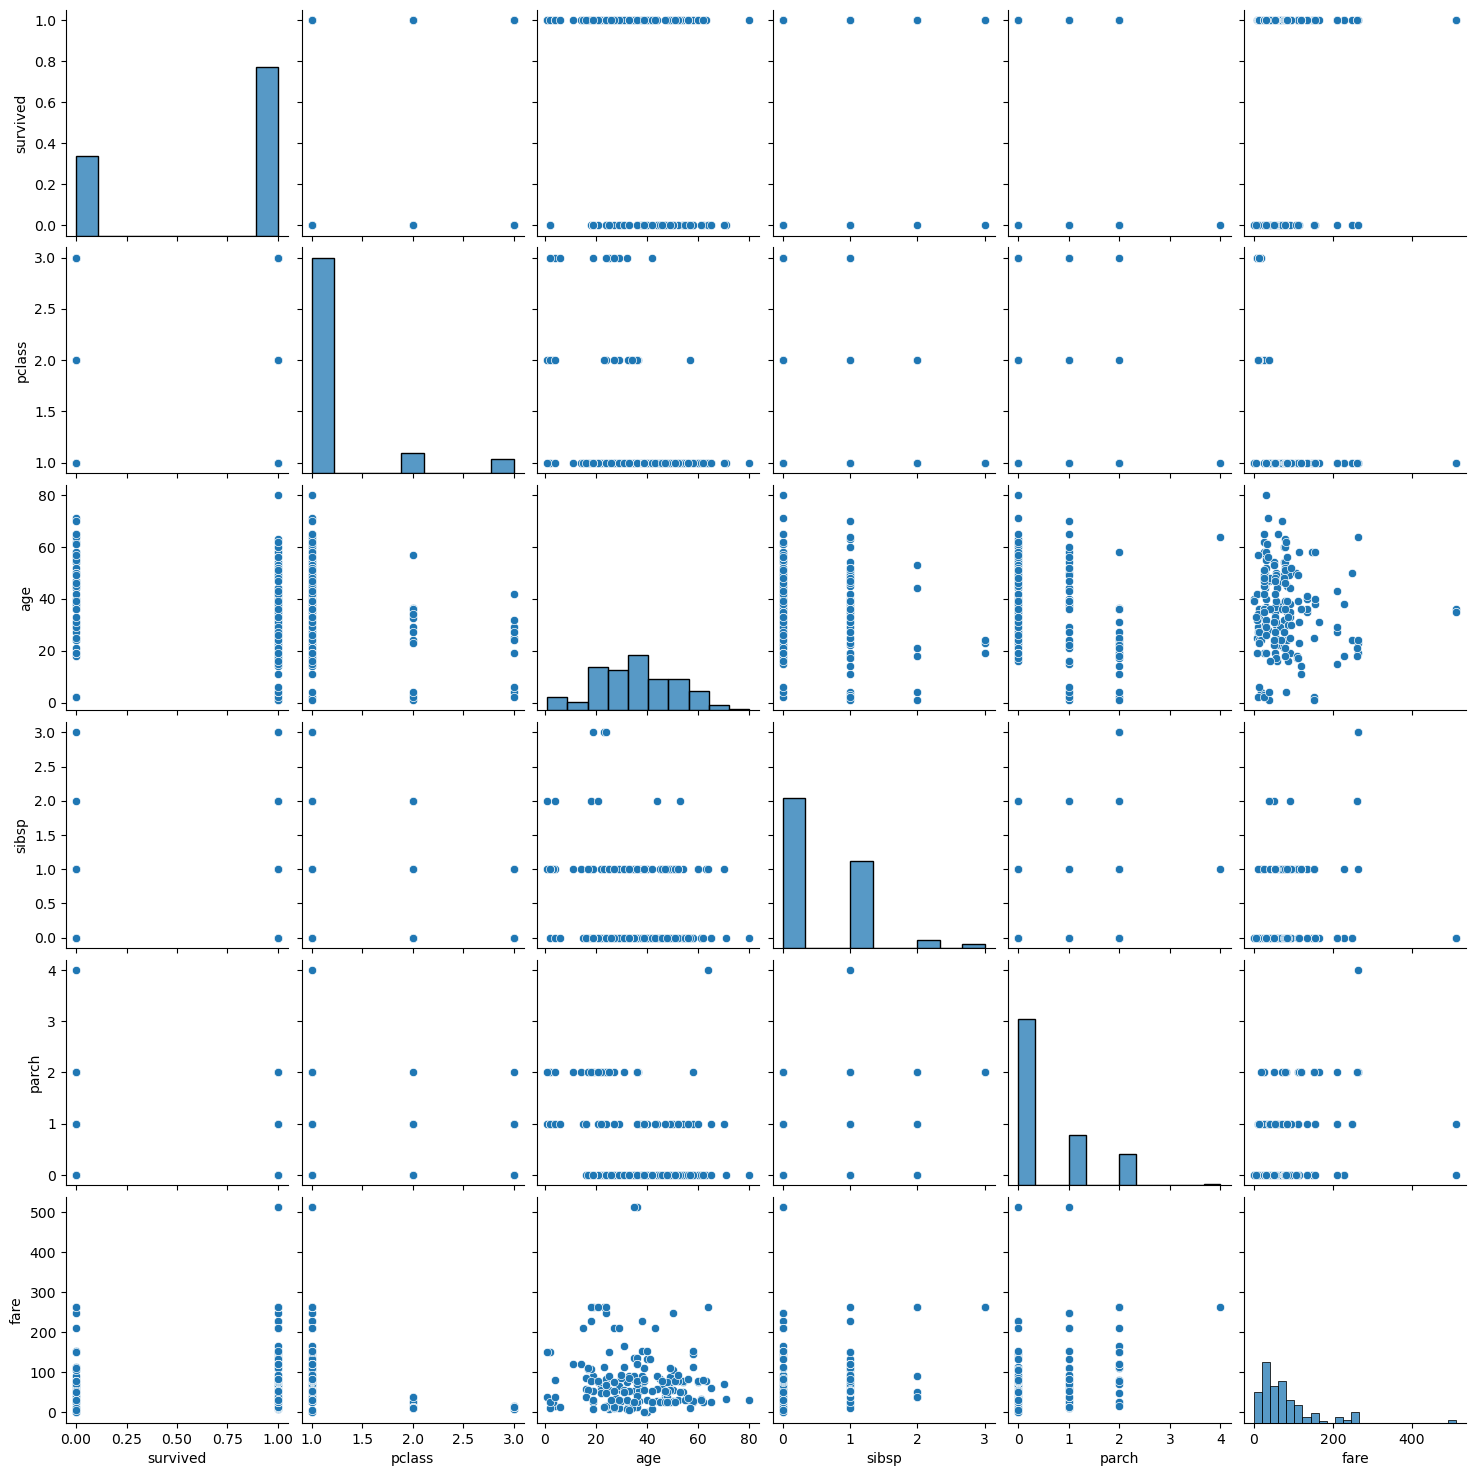

In [20]:
#afficher titanic avec sns.pairplot
sns.pairplot(titanic)

In [21]:
#contrairement auc graphiques de tout à l'heure, affichés avec pairplot, ces graphques ne sont pas utiles
#ils sont comme ça pcq'on a (dans titanic) bcp de variables qui forment des catégories
#par expemple, dans la colonne survived on a 2 valeurs: 0 et 1, et dans la colonne pclass, on a: 1,2, et 3
#et donc dans le grafique suvived= f(pclass) on a:
#2 lignes et 3 colonnes (chaque point représente plusieurs points superposés les uns sur les autres)
#on utilise alors les fonctions de la catégorie categorical plots de la documentation de seaborn

### sns.catplot()

In [23]:
#afficher les 5 premières lignes de titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,C
6,0,1,male,54.0,0,0,51.8625,E
10,1,3,female,4.0,1,1,16.7000,G
11,1,1,female,58.0,0,0,26.5500,C


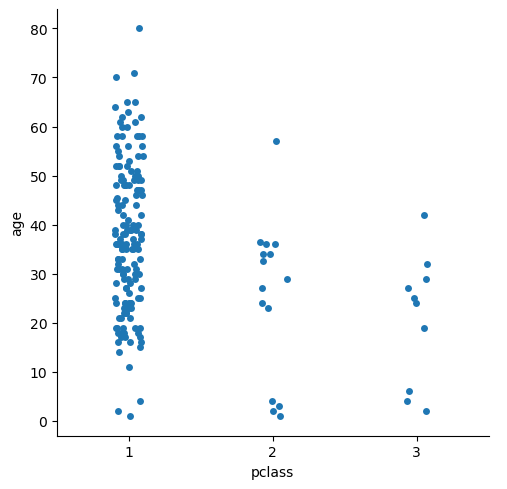

In [24]:
#afficher la colonne age en fonction de pclass de titanic avec sns.catplot
sns.catplot(x= 'pclass', y= 'age', data= titanic)

In [25]:
#c'est un peu plus lisible que le graph de tout à l'heure

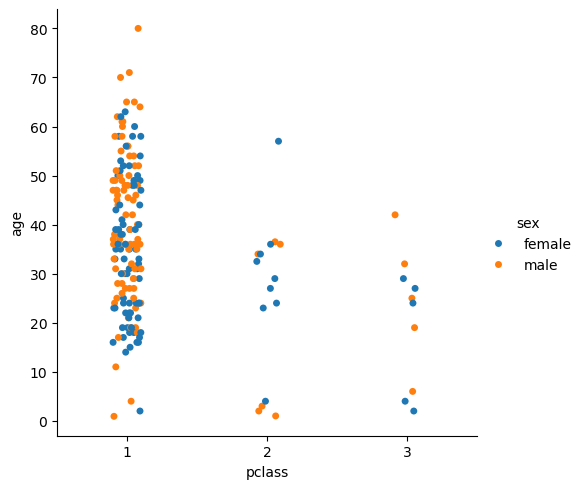

In [26]:
#afficher la colonne age en fonction de pclass de titanic avec sns.catplot
#les couleurs diffèrent selon la colonne sex
sns.catplot(x= 'pclass', y= 'age', data= titanic, hue= 'sex')

### sns.boxplot()

La structure du code ne change pas, on écrit seulement 'boxplot' à la place de 'catplot'.

<Axes: xlabel='pclass', ylabel='age'>

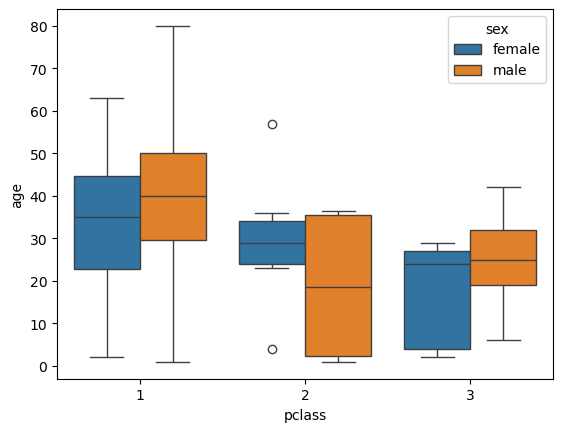

In [29]:
#afficher la colonne age en fonction de pclass de titanic avec sns.boxplot
#les couleurs diffèrent selon la colonne sex
sns.boxplot(x= 'pclass', y= 'age', data= titanic, hue= 'sex')

### Les distributions

C:\Users\HP\AppData\Local\Temp\ipykernel_864\1221776648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'])


<Axes: xlabel='fare', ylabel='Density'>

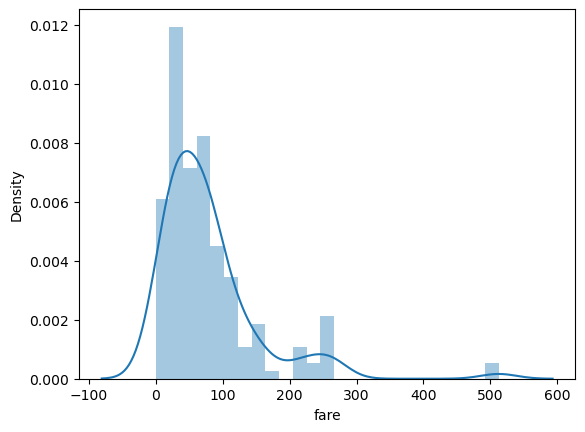

In [31]:
#visualiser la distribution de la colonne fare (=tarif) de titanic avec sns.distplot
sns.distplot(titanic['fare'])

In [32]:
#le tarif ne suit pas une distribution normale
#les gens préfèrent voyager avec des tarifs les moins chers que possible

### jointplot()

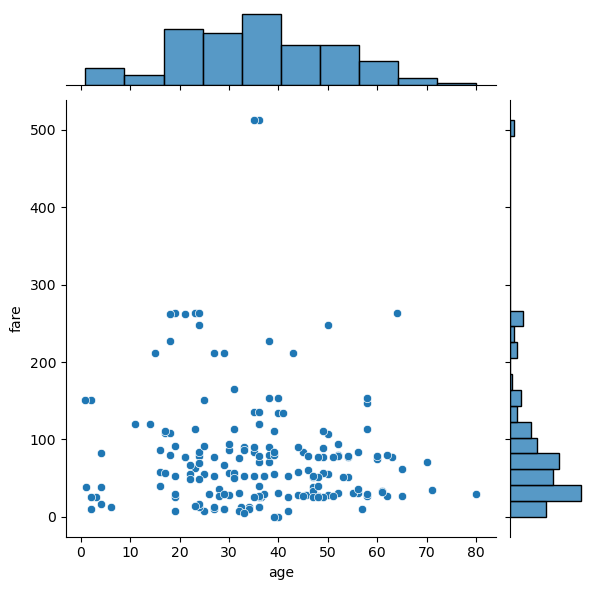

In [34]:
#afficher la colonne fare en fonction d'age de titanic avec sns.jointplot
sns.jointplot(x= 'age', y= 'fare', data= titanic)

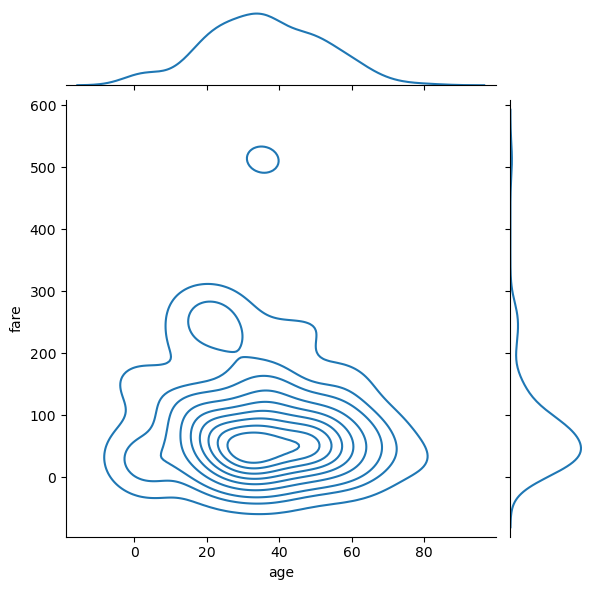

In [35]:
#afficher la colonne fare en fonction d'age de titanic avec sns.jointplot
# avec kind= kde
sns.jointplot(x= 'age', y= 'fare', data= titanic, kind= 'kde')

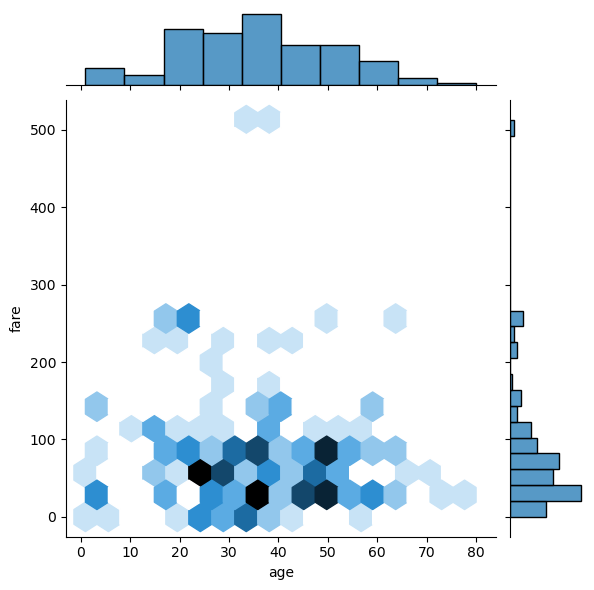

In [36]:
#afficher la colonne fare en fonction d'age de titanic avec sns.jointplot
# avec kind= hist
sns.jointplot(x= 'age', y= 'fare', data= titanic, kind='hex')

### sns.heatmap()

In [38]:
#afficher les 5 premières lignes de titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,C
6,0,1,male,54.0,0,0,51.8625,E
10,1,3,female,4.0,1,1,16.7000,G
11,1,1,female,58.0,0,0,26.5500,C


In [39]:
#la matrice de corrélation de titanic
#pour les colonnes avec des valeurs numériques seulement (numeric_only= True)
titanic.corr(numeric_only= True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.040373,-0.241600,0.095388,0.013898,0.130399
pclass,-0.040373,1.000000,-0.306812,-0.101946,0.048703,-0.316613
age,-0.241600,-0.306812,1.000000,-0.159712,-0.273362,-0.089887
sibsp,0.095388,-0.101946,-0.159712,1.000000,0.257184,0.283916
parch,0.013898,0.048703,-0.273362,0.257184,1.000000,0.387596
fare,0.130399,-0.316613,-0.089887,0.283916,0.387596,1.000000


<Axes: >

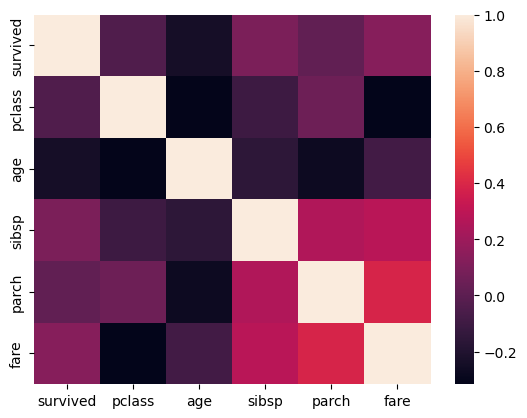

In [40]:
#visualiser la matrice de corrélation de titanic avec sns.heatmap
#pour les colonnes avec des valeurs numériques seulement (numeric_only= True)
sns.heatmap(titanic.corr(numeric_only= True))

**À retenir:**
Les fonctions Seaborn on presque toujours la même structure:

**sns.fonction(x,y,data, hue,size,kind)**

- **x,y,data** sont les données à afficher.
- **hue,size,kind** sont les options de ségmentation.

Les **fonctions les plus utiles** dans Seaborn sont:
1) **pairplot()**
2) **catplot()**
3) **boxplot()**
4) **distplot()**
5) **jointplot()**
6) **heatmap()**